In [9]:
import plotly.graph_objects as go
import requests
import pandas as pd

# URL de la API de Binance para obtener el precio de BTC/USDT cada minuto
url = 'https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1m'

# Realizar solicitud GET a la API
response = requests.get(url)

# Obtener los precios y fechas de los datos recibidos
prices = []
dates = []
for kline in response.json():
    prices.append(float(kline[4]))
    dates.append(kline[0])

# Convertir las fechas a un formato legible
dates = [date/1000 for date in dates]

# Crear un gráfico de barras con plotly
fig = go.Figure(data=[go.Candlestick(x=dates, open=prices, high=prices, low=prices, close=prices)])

# cargar datos en un dataframe de Pandas
df = pd.DataFrame({'Close': prices, 'Dates': dates})

# Mostrar el gráfico en una ventana emergente
fig.show()

In [10]:
import ta

# Calcular los promedios móviles de 50 y 200 días
df['SMA_50'] = ta.trend.sma_indicator(df['Close'], window=50)
df['SMA_200'] = ta.trend.sma_indicator(df['Close'], window=200)

In [11]:
# Calcular RSI
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

In [12]:
# Calcular bandas de Bollinger
middle = ta.volatility.bollinger_mavg(df['Close'], window=20)
std = ta.volatility.bollinger_hband_indicator(df['Close'], window=20)
df['BB_UPPER'] = middle + 2 * std
df['BB_MIDDLE'] = middle
df['BB_LOWER'] = middle - 2 * std

In [13]:
# Calcular MACD
df['MACD'] = ta.trend.macd(df['Close'], window_fast=12, window_slow=26) #window_sign=9

# Calcular MACD Signal
df['MACD_SIGNAL'] = ta.trend.macd_signal(df['Close'], window_fast=12, window_slow=26, window_sign=9)

# Calcular MACD Histogram
df['MACD_HIST'] = ta.trend.macd_diff(df['Close'], window_fast=12, window_slow=26, window_sign=9)

In [14]:
# Calcular niveles de Fibonacci
high = df['Close'].max()
low = df['Close'].min()
diff = high - low
df['FIB_23.6'] = high - (0.236 * diff)
df['FIB_38.2'] = high - (0.382 * diff)
df['FIB_50.0'] = high - (0.5 * diff)
df['FIB_61.8'] = high - (0.618 * diff)
df['FIB_78.6'] = high - (0.786 * diff)

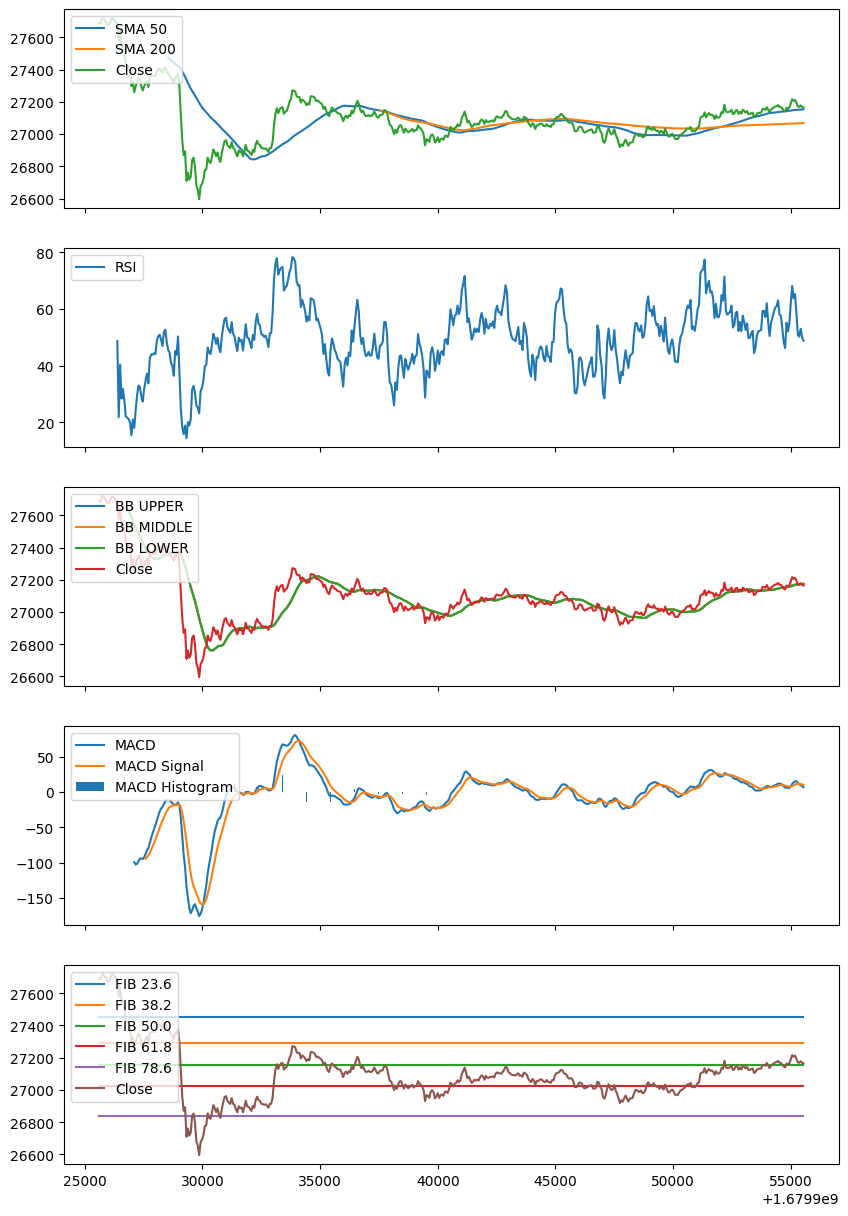

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear subplots con 5 filas y 1 columna
fig, axs = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(10,15))

# Trazas de SMA
axs[0].plot(df['Dates'], df['SMA_50'], label='SMA 50')
axs[0].plot(df['Dates'], df['SMA_200'], label='SMA 200')
axs[0].plot(df['Dates'], df['Close'], label='Close')
axs[0].legend(loc='upper left')

# Trazas de RSI
axs[1].plot(df['Dates'], df['RSI'], label='RSI')
axs[1].legend(loc='upper left')

# Trazas de bandas de Bollinger
axs[2].plot(df['Dates'], df['BB_UPPER'], label='BB UPPER')
axs[2].plot(df['Dates'], df['BB_MIDDLE'], label='BB MIDDLE')
axs[2].plot(df['Dates'], df['BB_LOWER'], label='BB LOWER')
axs[2].plot(df['Dates'], df['Close'], label='Close')
axs[2].legend(loc='upper left')

# Trazas de MACD
axs[3].plot(df['Dates'], df['MACD'], label='MACD')
axs[3].plot(df['Dates'], df['MACD_SIGNAL'], label='MACD Signal')
axs[3].bar(df['Dates'], df['MACD_HIST'], label='MACD Histogram')
axs[3].legend(loc='upper left')

# Trazas de Fibonacci
axs[4].plot(df['Dates'], df['FIB_23.6'], label='FIB 23.6')
axs[4].plot(df['Dates'], df['FIB_38.2'], label='FIB 38.2')
axs[4].plot(df['Dates'], df['FIB_50.0'], label='FIB 50.0')
axs[4].plot(df['Dates'], df['FIB_61.8'], label='FIB 61.8')
axs[4].plot(df['Dates'], df['FIB_78.6'], label='FIB 78.6')
axs[4].plot(df['Dates'], df['Close'], label='Close')
axs[4].legend(loc='upper left')

plt.show()